# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Data Science</font>

## <font color='blue'>Estudo de Caso 5</font>
### <font color='blue'>Aplicação Prática de Autovetores e Autovalores com PCA (Análise de Componentes Principais)</font>

![DSA](imagens/EC5.png)

In [1]:
# Versão da Linguagem Python
# Você pode usar a versão indicada nos vídeos ou a versão abaixo!
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.8.2
numpy     : 1.26.3



## Aplicação Prática de Autovetores e Autovalores com PCA

In [4]:
# Gerando dados bidimensionais correlacionados
np.random.seed(42)
X = np.random.randn(100, 2)
X[:, 1] = 0.8 * X[:, 0] + 0.1 * np.random.randn(100)

In [5]:
# Amostra dos dados
X[1:6]

array([[ 0.64768854,  0.57422928],
       [-0.23415337, -0.07901758],
       [ 1.57921282,  1.36875046],
       [-0.46947439, -0.51334645],
       [-0.46341769, -0.46451666]])

In [6]:
# Centralizando os dados (subtraindo a média)
X_centered = X - np.mean(X, axis = 0)

In [7]:
print(X_centered)

[[ 6.12278408e-01  5.19111837e-01]
 [ 7.63252793e-01  6.60191062e-01]
 [-1.18589120e-01  6.94420306e-03]
 [ 1.69477707e+00  1.45471224e+00]
 [-3.53910131e-01 -4.27384667e-01]
 [-3.47853438e-01 -3.78554880e-01]
 [ 3.57526526e-01  3.31035122e-01]
 [-1.60935358e+00 -1.24259389e+00]
 [-8.97266866e-01 -6.72798349e-01]
 [-7.92459821e-01 -2.55184333e-01]
 [ 1.58121302e+00  1.31556984e+00]
 [ 1.83092459e-01  2.53540906e-01]
 [-4.28818470e-01 -2.54144225e-01]
 [-1.03542932e+00 -7.69693958e-01]
 [-4.85074435e-01 -4.26076098e-01]
 [-4.86142357e-01 -3.19506589e-01]
 [ 1.02067030e-01 -2.11852272e-03]
 [ 9.38109167e-01  7.20315848e-01]
 [ 3.24427850e-01  2.04516300e-01]
 [-1.21262179e+00 -9.68399647e-01]
 [ 8.54030835e-01  9.08200899e-01]
 [-8.40275999e-05 -1.93283367e-01]
 [-1.36295774e+00 -1.02822979e+00]
 [-3.45074516e-01 -4.43820825e-01]
 [ 4.59182544e-01  3.13663224e-01]
 [ 4.39648224e-01  4.54124014e-01]
 [-5.61357746e-01 -4.49147820e-01]
 [ 1.14656378e+00  8.02986919e-01]
 [-7.23653268e-01 -6

In [8]:
# Calculando a matriz de covariância
cov_matrix = np.cov(X_centered.T)

A matriz de covariância é uma matriz quadrada que descreve a covariância entre cada par de variáveis em um conjunto de dados. A covariância é uma medida que indica o grau em que duas variáveis variam juntas. Se a covariância for positiva, isso significa que ambas as variáveis tendem a aumentar ou diminuir juntas; se for negativa, uma variável tende a aumentar quando a outra diminui, e vice-versa. Se a covariância for zero, as variáveis são estatisticamente independentes (embora isso não implique necessariamente independência causal).

Para um conjunto de dados com n variáveis, a matriz de covariância é uma matriz n x n, onde o elemento na i-ésima linha e j-ésima coluna é a covariância entre a i-ésima variável e a j-ésima variável. A diagonal principal da matriz de covariância contém as variâncias de cada variável, que são as covariâncias de cada variável consigo mesma.

A matriz de covariância é simétrica, ou seja, a covariância entre a variável i e a variável j é igual à covariância entre a variável j e a variável i. Isso acontece porque a covariância é comutativa: cov(X, Y) = cov(Y, X).

A matriz de covariância é amplamente utilizada em estatística e aprendizado de máquina para analisar a estrutura de correlação entre variáveis em um conjunto de dados. 

PCA usa a matriz de covariância para identificar as direções de maior variância nos dados e projetar os dados nessas direções, reduzindo a dimensionalidade.

In [9]:
# Calculando autovalores e autovetores da matriz de covariância
autovalores, autovetores = np.linalg.eig(cov_matrix)

In [10]:
autovalores

array([1.22907219, 0.00686564])

In [11]:
autovetores

array([[ 0.77093473, -0.63691416],
       [ 0.63691416,  0.77093473]])

In [12]:
# Ordenando autovalores e autovetores por ordem decrescente de autovalores
idx = np.argsort(autovalores)[::-1]
autovalores = autovalores[idx]
autovetores = autovetores[:, idx]

In [13]:
# Projetando os dados nos autovetores (componentes principais)
x_pca = X_centered @ autovetores

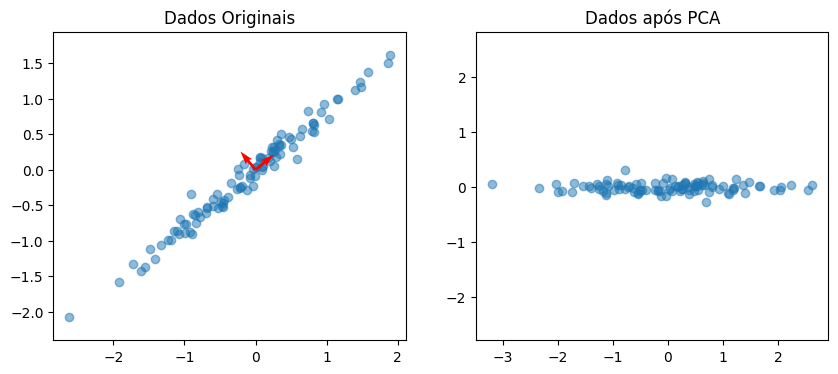

In [14]:
# Visualizando os dados originais e os componentes principais
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
axes[0].set_title('Dados Originais')
axes[0].axis('equal')
axes[0].quiver(0, 0, autovetores[0, 0], autovetores[1, 0], color='r', angles='xy', scale_units='xy', scale=3)
axes[0].quiver(0, 0, autovetores[0, 1], autovetores[1, 1], color='r', angles='xy', scale_units='xy', scale=3)

axes[1].scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5)
axes[1].set_title('Dados após PCA')
axes[1].axis('equal')

plt.show()

## Redução de Dimensionalidade em Machine Learning com PCA

In [15]:
# Imports
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.8.2
numpy     : 1.26.3
sklearn   : 1.3.2



In [17]:
# Gere um conjunto de dados com 200 observações e 5 variáveis
np.random.seed(42)
dados = np.random.randn(200, 5)

In [18]:
dados[1:5]

array([[-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272]])

In [19]:
# Padronizando os dados (média 0, desvio padrão 1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dados)

In [23]:
# Aplicando PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_scaled)

In [24]:
# Exibindo os autovalores e autovetores da matriz de covariância
print("Autovalores:")
print(pca.explained_variance_)
print("\nAutovetores (Componentes Principais):")
print(pca.components_)

Autovalores:
[1.17508779 1.07187386 1.01839674 0.93396412]

Autovetores (Componentes Principais):
[[-0.12251671  0.43933549  0.61273362 -0.05886818  0.64270213]
 [ 0.78543169 -0.47225102  0.36436581 -0.11943807  0.11422843]
 [ 0.01514329 -0.03872691  0.27392193  0.94988148 -0.14478554]
 [-0.45236259 -0.72362569 -0.09449617  0.08209103  0.50602913]]


In [25]:
# Exibindo a proporção da variância explicada por cada componente principal
print("Proporção da variância explicada:")
print(pca.explained_variance_ratio_)

Proporção da variância explicada:
[0.23384247 0.2133029  0.20266095 0.18585886]


In [26]:
# Exibindo os dados transformados
print("Dados Transformados:")
print(data_pca[1:10])

Dados Transformados:
[[ 1.55503708 -0.53199267 -0.44319714 -0.94392   ]
 [-0.98002519 -0.02928903 -1.6167788  -0.53665955]
 [-1.02776913  0.08426755 -0.63242381  0.14052582]
 [-0.53028848  1.48774352 -1.33043338 -1.00715835]
 [-0.45590295  0.82686992 -0.45436325  0.48590942]
 [ 1.43788876 -1.16260295 -1.29953417 -0.79912052]
 [-0.8173191  -1.67846026 -1.97689113  0.55356802]
 [-1.02895966  0.37482946 -0.17354675 -1.28890338]
 [-0.58693947 -0.22270587  0.83464082 -0.32287834]]


# Fim